In [ ]:

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score 
import warnings
warnings.filterwarnings("ignore")

import os
import time

In [ ]:
data = pd.read_excel('Customer Churn Data.xlsx',sheet_name='Data for DSBA')
data.head()

,AccountID,Churn,Tenure,City_Tier,CC_Contacted_LY,Payment,Gender,Service_Score,Account_user_count,account_segment,CC_Agent_Score,Marital_Status,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback,Login_device
0,20000,1,4.0,3.0,6.0,Debit Card,Female,3.0,3.0,Super,2.0,Single,9.0,1.0,11.0,1.0,5.0,159.93,Mobile
1,20001,1,0.0,1.0,8.0,UPI,Male,3.0,4.0,Regular Plus,3.0,Single,7.0,1.0,15.0,0.0,0.0,120.90,Mobile
2,20002,1,0.0,1.0,30.0,Debit Card,Male,2.0,4.0,Regular Plus,3.0,Single,6.0,1.0,14.0,0.0,3.0,NaN,Mobile
3,20003,1,0.0,3.0,15.0,Debit Card,Male,2.0,4.0,Super,5.0,Single,8.0,0.0,23.0,0.0,3.0,134.07,Mobile
4,20004,1,0.0,1.0,12.0,Credit Card,Male,2.0,3.0,Regular Plus,5.0,Single,3.0,0.0,11.0,1.0,3.0,129.60,Mobile


In [ ]:
data.shape

(11260, 19)

In [ ]:
data.dtypes

AccountID                    int64
Churn                        int64
Tenure                     float64
City_Tier                  float64
CC_Contacted_LY            float64
Payment                     object
Gender                      object
Service_Score              float64
Account_user_count         float64
account_segment             object
CC_Agent_Score             float64
Marital_Status              object
rev_per_month              float64
Complain_ly                float64
rev_growth_yoy             float64
coupon_used_for_payment    float64
Day_Since_CC_connect       float64
cashback                   float64
Login_device                object
dtype: object

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11260 entries, 0 to 11259
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   AccountID                11260 non-null  int64  
 1   Churn                    11260 non-null  int64  
 2   Tenure                   11042 non-null  float64
 3   City_Tier                11148 non-null  float64
 4   CC_Contacted_LY          11158 non-null  float64
 5   Payment                  11151 non-null  object 
 6   Gender                   11152 non-null  object 
 7   Service_Score            11162 non-null  float64
 8   Account_user_count       10816 non-null  float64
 9   account_segment          11163 non-null  object 
 10  CC_Agent_Score           11144 non-null  float64
 11  Marital_Status           11048 non-null  object 
 12  rev_per_month            10469 non-null  float64
 13  Complain_ly              10903 non-null  float64
 14  rev_growth_yoy        

In [ ]:
data.describe()

,AccountID,Churn,Tenure,City_Tier,CC_Contacted_LY,Service_Score,Account_user_count,CC_Agent_Score,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback
count,11260.00000,11260.000000,11042.000000,11148.000000,11158.000000,11162.000000,10816.000000,11144.000000,10469.000000,10903.000000,11257.000000,11257.000000,10902.000000,10787.000000
mean,25629.50000,0.168384,11.025086,1.653929,17.867091,2.902526,3.692862,3.066493,6.362594,0.285334,16.193391,1.790619,4.633187,196.236370
std,3250.62635,0.374223,12.879782,0.915015,8.853269,0.725584,1.022976,1.379772,11.909686,0.451594,3.757721,1.969551,3.697637,178.660514
min,20000.00000,0.000000,0.000000,1.000000,4.000000,0.000000,1.000000,1.000000,1.000000,0.000000,4.000000,0.000000,0.000000,0.000000
25%,22814.75000,0.000000,2.000000,1.000000,11.000000,2.000000,3.000000,2.000000,3.000000,0.000000,13.000000,1.000000,2.000000,147.210000
50%,25629.50000,0.000000,9.000000,1.000000,16.000000,3.000000,4.000000,3.000000,5.000000,0.000000,15.000000,1.000000,3.000000,165.250000
75%,28444.25000,0.000000,16.000000,3.000000,23.000000,3.000000,4.000000,4.000000,7.000000,1.000000,19.000000,2.000000,8.000000,200.010000
max,31259.00000,1.000000,99.000000,3.000000,132.000000,5.000000,6.000000,5.000000,140.000000,1.000000,28.000000,16.000000,47.000000,1997.000000


In [ ]:
data.drop('AccountID', axis=1, inplace=True)

In [ ]:
cat =[]
num =[]

for i in data.columns:
    if data[i].dtype == 'object':
        cat.append(i)
    else:
        num.append(i)

In [ ]:
print('cat = ' + str(cat))
print('num = ' + str(num))

cat = ['Payment', 'Gender', 'account_segment', 'Marital_Status', 'Login_device']
num = ['Churn', 'Tenure', 'City_Tier', 'CC_Contacted_LY', 'Service_Score', 'Account_user_count', 'CC_Agent_Score', 'rev_per_month', 'Complain_ly', 'rev_growth_yoy', 'coupon_used_for_payment', 'Day_Since_CC_connect', 'cashback']


In [ ]:
data = data[['Payment', 'Gender', 'account_segment', 'Marital_Status', 'Login_device','Churn', 'Tenure', 'City_Tier', 'CC_Contacted_LY', 'Service_Score', 'Account_user_count', 'CC_Agent_Score', 'rev_per_month', 'Complain_ly', 'rev_growth_yoy', 'coupon_used_for_payment', 'Day_Since_CC_connect', 'cashback']]

In [ ]:
data.head()

,Payment,Gender,account_segment,Marital_Status,Login_device,Churn,Tenure,City_Tier,CC_Contacted_LY,Service_Score,Account_user_count,CC_Agent_Score,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback
0,Debit Card,Female,Super,Single,Mobile,1,4.0,3.0,6.0,3.0,3.0,2.0,9.0,1.0,11.0,1.0,5.0,159.93
1,UPI,Male,Regular Plus,Single,Mobile,1,0.0,1.0,8.0,3.0,4.0,3.0,7.0,1.0,15.0,0.0,0.0,120.90
2,Debit Card,Male,Regular Plus,Single,Mobile,1,0.0,1.0,30.0,2.0,4.0,3.0,6.0,1.0,14.0,0.0,3.0,NaN
3,Debit Card,Male,Super,Single,Mobile,1,0.0,3.0,15.0,2.0,4.0,5.0,8.0,0.0,23.0,0.0,3.0,134.07
4,Credit Card,Male,Regular Plus,Single,Mobile,1,0.0,1.0,12.0,2.0,3.0,5.0,3.0,0.0,11.0,1.0,3.0,129.60


In [ ]:
data.isnull().sum()

Payment                    109
Gender                     108
account_segment             97
Marital_Status             212
Login_device               760
Churn                        0
Tenure                     218
City_Tier                  112
CC_Contacted_LY            102
Service_Score               98
Account_user_count         444
CC_Agent_Score             116
rev_per_month              791
Complain_ly                357
rev_growth_yoy               3
coupon_used_for_payment      3
Day_Since_CC_connect       358
cashback                   473
dtype: int64

In [ ]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='median', verbose=1)

In [ ]:
imputer = imputer.fit(data.iloc[:, 5:19])
data.iloc[:, 5:19] = imputer.transform(data.iloc[:, 5:19])

In [ ]:
data.isnull().sum()

Payment                    109
Gender                     108
account_segment             97
Marital_Status             212
Login_device               760
Churn                        0
Tenure                       0
City_Tier                    0
CC_Contacted_LY              0
Service_Score                0
Account_user_count           0
CC_Agent_Score               0
rev_per_month                0
Complain_ly                  0
rev_growth_yoy               0
coupon_used_for_payment      0
Day_Since_CC_connect         0
cashback                     0
dtype: int64

In [ ]:
data['Gender'] = data['Gender'].replace({'F':'Female'})
data['Gender'] = data['Gender'].replace({'M':'Male'})

In [ ]:
for i in data.columns:
    if data[i].dtype =='object':
        print(i.upper(), ': ', data[i].nunique())
        print(data[i].value_counts().sort_values())
        print('\n')

PAYMENT :  5
UPI                  822
Cash on Delivery    1014
E wallet            1217
Credit Card         3511
Debit Card          4587
Name: Payment, dtype: int64


GENDER :  2
Female    4448
Male      6704
Name: Gender, dtype: int64


ACCOUNT_SEGMENT :  5
Regular          520
Super Plus       818
HNI             1639
Super           4062
Regular Plus    4124
Name: account_segment, dtype: int64


MARITAL_STATUS :  3
Divorced    1668
Single      3520
Married     5860
Name: Marital_Status, dtype: int64


LOGIN_DEVICE :  2
Computer    3018
Mobile      7482
Name: Login_device, dtype: int64




In [ ]:
data = pd.get_dummies(data, drop_first=True)

In [ ]:
data.head()

,Churn,Tenure,City_Tier,CC_Contacted_LY,Service_Score,Account_user_count,CC_Agent_Score,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback,Payment_Credit Card,Payment_Debit Card,Payment_E wallet,Payment_UPI,Gender_Male,account_segment_Regular,account_segment_Regular Plus,account_segment_Super,account_segment_Super Plus,Marital_Status_Married,Marital_Status_Single,Login_device_Mobile
0,1.0,4.0,3.0,6.0,3.0,3.0,2.0,9.0,1.0,11.0,1.0,5.0,159.93,0,1,0,0,0,0,0,1,0,0,1,1
1,1.0,0.0,1.0,8.0,3.0,4.0,3.0,7.0,1.0,15.0,0.0,0.0,120.90,0,0,0,1,1,0,1,0,0,0,1,1
2,1.0,0.0,1.0,30.0,2.0,4.0,3.0,6.0,1.0,14.0,0.0,3.0,165.25,0,1,0,0,1,0,1,0,0,0,1,1
3,1.0,0.0,3.0,15.0,2.0,4.0,5.0,8.0,0.0,23.0,0.0,3.0,134.07,0,1,0,0,1,0,0,1,0,0,1,1
4,1.0,0.0,1.0,12.0,2.0,3.0,5.0,3.0,0.0,11.0,1.0,3.0,129.60,1,0,0,0,1,0,1,0,0,0,1,1


In [ ]:
data.shape

(11260, 25)

[Text(0, 0, 'Churn'),
 Text(0, 0, 'Tenure'),
 Text(0, 0, 'City_Tier'),
 Text(0, 0, 'CC_Contacted_LY'),
 Text(0, 0, 'Service_Score'),
 Text(0, 0, 'Account_user_count'),
 Text(0, 0, 'CC_Agent_Score'),
 Text(0, 0, 'rev_per_month'),
 Text(0, 0, 'Complain_ly'),
 Text(0, 0, 'rev_growth_yoy'),
 Text(0, 0, 'coupon_used_for_payment'),
 Text(0, 0, 'Day_Since_CC_connect'),
 Text(0, 0, 'cashback')]

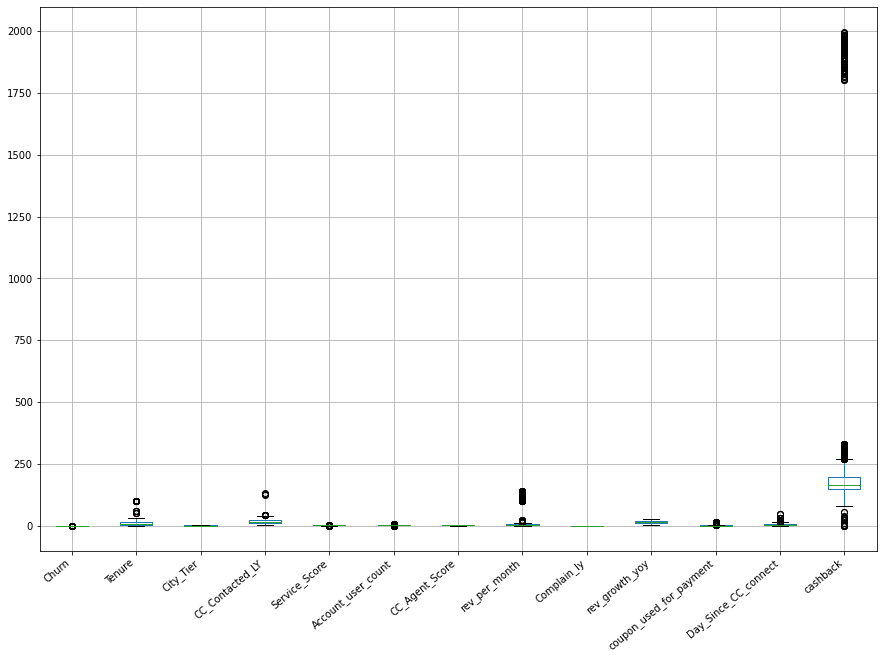

In [ ]:
#Outlier treatment
plt.figure(figsize=(15,10))
a = data[num].boxplot()
a.set_xticklabels(a.get_xticklabels() ,rotation=40, ha="right")

In [ ]:
num

['Churn',
 'Tenure',
 'City_Tier',
 'CC_Contacted_LY',
 'Service_Score',
 'Account_user_count',
 'CC_Agent_Score',
 'rev_per_month',
 'Complain_ly',
 'rev_growth_yoy',
 'coupon_used_for_payment',
 'Day_Since_CC_connect',
 'cashback']

In [ ]:
cols = {'Churn','CityTier','Service_Score','Account_user_count','CC_Agent_Score','Complain_ly'}

In [ ]:
num1 = [ele for ele in num if ele not in cols]
print(num1)

['Tenure', 'City_Tier', 'CC_Contacted_LY', 'rev_per_month', 'rev_growth_yoy', 'coupon_used_for_payment', 'Day_Since_CC_connect', 'cashback']


[Text(0, 0, 'Tenure'),
 Text(0, 0, 'City_Tier'),
 Text(0, 0, 'CC_Contacted_LY'),
 Text(0, 0, 'rev_per_month'),
 Text(0, 0, 'rev_growth_yoy'),
 Text(0, 0, 'coupon_used_for_payment'),
 Text(0, 0, 'Day_Since_CC_connect'),
 Text(0, 0, 'cashback')]

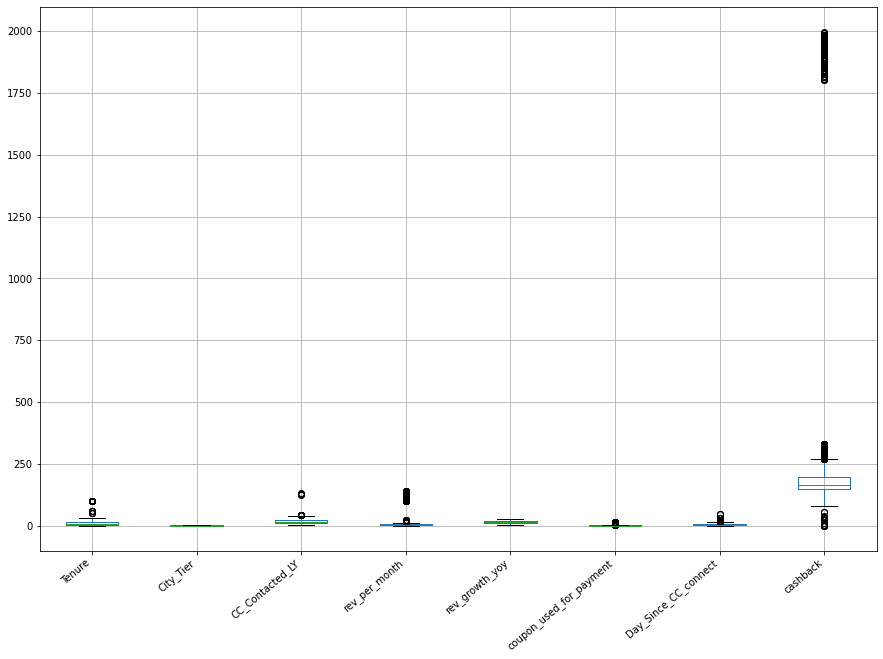

In [ ]:
plt.figure(figsize=(15,10))
a = data[num1].boxplot()
a.set_xticklabels(a.get_xticklabels() ,rotation=40, ha="right")

In [ ]:
def remove_outliers(col):
    sorted(col)
    Q1, Q3 = np.percentile(col, [25,75])
    IQR = Q3-Q1
    lower_range = Q1-(1.5*IQR) 
    upper_range = Q3+(1.5*IQR)
    return lower_range, upper_range

In [ ]:
for column in data[num1].columns:
    lr,ur=remove_outliers(data[column])
    data[column]=np.where(data[column]>ur,ur,data[column])
    data[column]=np.where(data[column]<lr,lr,data[column])

[Text(0, 0, 'Tenure'),
 Text(0, 0, 'City_Tier'),
 Text(0, 0, 'CC_Contacted_LY'),
 Text(0, 0, 'rev_per_month'),
 Text(0, 0, 'rev_growth_yoy'),
 Text(0, 0, 'coupon_used_for_payment'),
 Text(0, 0, 'Day_Since_CC_connect'),
 Text(0, 0, 'cashback')]

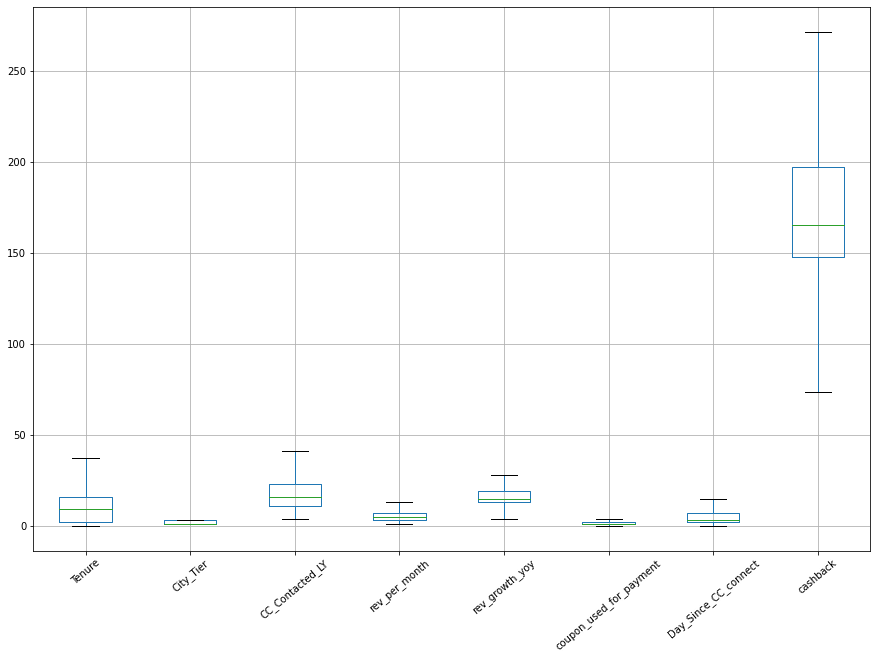

In [ ]:
plt.figure(figsize=(15,10))
a = data[num1].boxplot()
a.set_xticklabels(a.get_xticklabels(), rotation=40)

In [ ]:
# Scaling
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()
df1 = scaler.fit_transform(data)
df1

array([[ 2.22234528, -0.70331481,  1.48191371, ..., -1.04172222,
         1.48285658,  0.71059496],
       [ 2.22234528, -1.15333398, -0.70933361, ..., -1.04172222,
         1.48285658,  0.71059496],
       [ 2.22234528, -1.15333398, -0.70933361, ..., -1.04172222,
         1.48285658,  0.71059496],
       ...,
       [-0.44997508, -1.04082919, -0.70933361, ...,  0.9599488 ,
        -0.67437405,  0.71059496],
       [-0.44997508,  1.43427623,  1.48191371, ...,  0.9599488 ,
        -0.67437405, -1.40727144],
       [-0.44997508, -0.25329565, -0.70933361, ...,  0.9599488 ,
        -0.67437405,  0.71059496]])

In [ ]:
df1 = pd.DataFrame(df1, columns= data.columns, index = data.index)
df1.head()

,Churn,Tenure,City_Tier,CC_Contacted_LY,Service_Score,Account_user_count,CC_Agent_Score,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback,Payment_Credit Card,Payment_Debit Card,Payment_E wallet,Payment_UPI,Gender_Male,account_segment_Regular,account_segment_Regular Plus,account_segment_Super,account_segment_Super Plus,Marital_Status_Married,Marital_Status_Single,Login_device_Mobile
0,2.222345,-0.703315,1.481914,-1.379652,0.133748,-0.701928,-0.776488,1.302037,1.618461,-1.382201,-0.431239,0.129884,-0.398295,-0.673120,1.206136,-0.348108,-0.280626,-1.213040,-0.220039,-0.760207,1.331177,-0.279888,-1.041722,1.482857,0.710595
1,2.222345,-1.153334,-0.709334,-1.146110,0.133748,0.293752,-0.047944,0.607469,1.618461,-0.317551,-1.338515,-1.301411,-1.294067,-0.673120,-0.829094,-0.348108,3.563467,0.824375,-0.220039,1.315431,-0.751215,-0.279888,-1.041722,1.482857,0.710595
2,2.222345,-1.153334,-0.709334,1.422855,-1.250443,0.293752,-0.047944,0.260185,1.618461,-0.583714,-1.338515,-0.442634,-0.276197,-0.673120,1.206136,-0.348108,-0.280626,0.824375,-0.220039,1.315431,-0.751215,-0.279888,-1.041722,1.482857,0.710595
3,2.222345,-1.153334,1.481914,-0.328712,-1.250443,0.293752,1.409143,0.954753,-0.617871,1.811748,-1.338515,-0.442634,-0.991804,-0.673120,1.206136,-0.348108,-0.280626,0.824375,-0.220039,-0.760207,1.331177,-0.279888,-1.041722,1.482857,0.710595
4,2.222345,-1.153334,-0.709334,-0.679025,-1.250443,-0.701928,1.409143,-0.781666,-0.617871,-1.382201,-0.431239,-0.442634,-1.094395,1.485619,-0.829094,-0.348108,-0.280626,0.824375,-0.220039,1.315431,-0.751215,-0.279888,-1.041722,1.482857,0.710595


In [ ]:
# K-Means Clustering
from sklearn.cluster import KMeans 


In [ ]:
wss = []

for i in range(1,8):
    KM = KMeans(n_clusters=i)
    KM.fit(df1)
    wss.append(KM.inertia_)

In [ ]:
wss


[281499.9999999996,
 257181.94342500664,
 239630.6582012925,
 227502.94372655416,
 215577.66486764525,
 207928.42394701685,
 198124.17490932933]

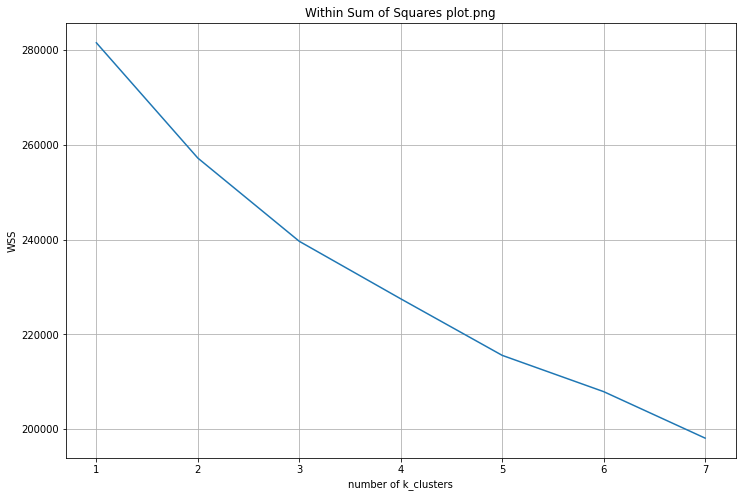

In [ ]:
plt.figure(figsize=(12,8))
plt.plot(range(1,8), wss)
plt.title('Within Sum of Squares plot.png')
plt.grid()
#plt.savefig('q1_Within Sum of Squares plot.jpg')
plt.ylabel('WSS')
plt.xlabel('number of k_clusters')
plt.show()

In [ ]:
#Performing k-means with 2 clusters
KM = KMeans(n_clusters=2, random_state=1)
KM.fit(df1)

KMeans(n_clusters=2, random_state=1)

In [ ]:
labels1 = KM.labels_
labels1

array([0, 1, 1, ..., 0, 0, 0], dtype=int32)

Text(0.5, 1.0, 'Heatmap with Lower Diagnal')

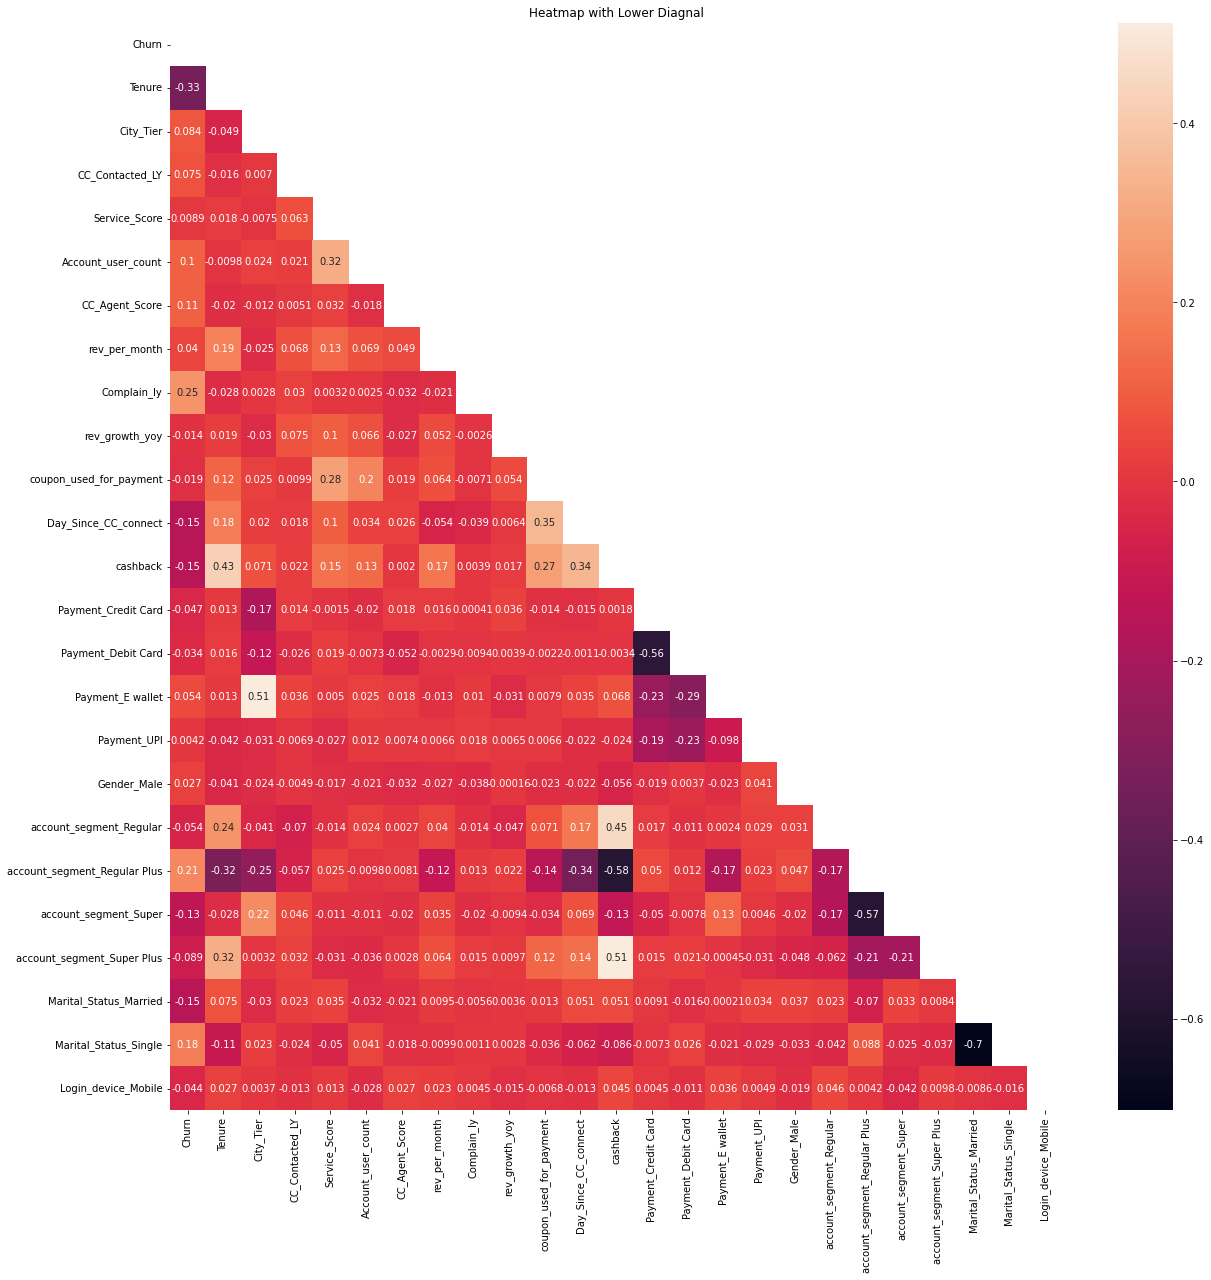

In [ ]:
df2 = data.copy()
plt.figure(figsize=(20,20))

corr1= df2.corr()
# Getting the Upper Triangle of the co-relation matrix
matrix = np.triu(corr1)
# using the upper triangle matrix as mask 
sns.heatmap(corr1, annot=True, mask=matrix)

plt.title('Heatmap with Lower Diagnal')

In [ ]:
DATA = df1.copy()
X = DATA.drop('Churn', axis=1)

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
vif_data = pd.DataFrame() 
vif_data["feature"] = X.columns 

vif_data["VIF"] = [variance_inflation_factor(X.values, i) 
                          for i in range(len(X.columns))] 

In [ ]:
vif_data.sort_values(by='VIF', ascending=False)

,feature,VIF
18,account_segment_Regular Plus,4.704377
11,cashback,4.583975
13,Payment_Debit Card,3.043911
19,account_segment_Super,2.963643
12,Payment_Credit Card,2.873559
14,Payment_E wallet,2.205188
22,Marital_Status_Single,2.005570
21,Marital_Status_Married,1.986632
20,account_segment_Super Plus,1.831577
17,account_segment_Regular,1.667570


In [ ]:
# Train Test Splitting and Scaling

In [ ]:
data.to_csv('churn_base.csv', index=False)
df2.to_csv('churn_clustered.csv', index=False)

In [ ]:
data = pd.read_csv('churn_base.csv')
data.head()

,Churn,Tenure,City_Tier,CC_Contacted_LY,Service_Score,Account_user_count,CC_Agent_Score,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback,Payment_Credit Card,Payment_Debit Card,Payment_E wallet,Payment_UPI,Gender_Male,account_segment_Regular,account_segment_Regular Plus,account_segment_Super,account_segment_Super Plus,Marital_Status_Married,Marital_Status_Single,Login_device_Mobile
0,1.0,4.0,3.0,6.0,3.0,3.0,2.0,9.0,1.0,11.0,1.0,5.0,159.93,0,1,0,0,0,0,0,1,0,0,1,1
1,1.0,0.0,1.0,8.0,3.0,4.0,3.0,7.0,1.0,15.0,0.0,0.0,120.90,0,0,0,1,1,0,1,0,0,0,1,1
2,1.0,0.0,1.0,30.0,2.0,4.0,3.0,6.0,1.0,14.0,0.0,3.0,165.25,0,1,0,0,1,0,1,0,0,0,1,1
3,1.0,0.0,3.0,15.0,2.0,4.0,5.0,8.0,0.0,23.0,0.0,3.0,134.07,0,1,0,0,1,0,0,1,0,0,1,1
4,1.0,0.0,1.0,12.0,2.0,3.0,5.0,3.0,0.0,11.0,1.0,3.0,129.60,1,0,0,0,1,0,1,0,0,0,1,1


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve

In [ ]:
X= data.drop('Churn', axis=1)
y= data['Churn']

In [ ]:
#scaling the independent features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[-0.70331481,  1.48191371, -1.37965207, ..., -1.04172222,
         1.48285658,  0.71059496],
       [-1.15333398, -0.70933361, -1.14610979, ..., -1.04172222,
         1.48285658,  0.71059496],
       [-1.15333398, -0.70933361,  1.42285532, ..., -1.04172222,
         1.48285658,  0.71059496],
       ...,
       [-1.04082919, -0.70933361, -0.44548294, ...,  0.9599488 ,
        -0.67437405,  0.71059496],
       [ 1.43427623,  1.48191371, -0.79579637, ...,  0.9599488 ,
        -0.67437405, -1.40727144],
       [-0.25329565, -0.70933361,  0.48868619, ...,  0.9599488 ,
        -0.67437405,  0.71059496]])

In [ ]:
X_scaled = pd.DataFrame(X_scaled, columns=X.columns, index=X.index)
X_scaled.head()

,Tenure,City_Tier,CC_Contacted_LY,Service_Score,Account_user_count,CC_Agent_Score,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback,Payment_Credit Card,Payment_Debit Card,Payment_E wallet,Payment_UPI,Gender_Male,account_segment_Regular,account_segment_Regular Plus,account_segment_Super,account_segment_Super Plus,Marital_Status_Married,Marital_Status_Single,Login_device_Mobile
0,-0.703315,1.481914,-1.379652,0.133748,-0.701928,-0.776488,1.302037,1.618461,-1.382201,-0.431239,0.129884,-0.398295,-0.673120,1.206136,-0.348108,-0.280626,-1.213040,-0.220039,-0.760207,1.331177,-0.279888,-1.041722,1.482857,0.710595
1,-1.153334,-0.709334,-1.146110,0.133748,0.293752,-0.047944,0.607469,1.618461,-0.317551,-1.338515,-1.301411,-1.294067,-0.673120,-0.829094,-0.348108,3.563467,0.824375,-0.220039,1.315431,-0.751215,-0.279888,-1.041722,1.482857,0.710595
2,-1.153334,-0.709334,1.422855,-1.250443,0.293752,-0.047944,0.260185,1.618461,-0.583714,-1.338515,-0.442634,-0.276197,-0.673120,1.206136,-0.348108,-0.280626,0.824375,-0.220039,1.315431,-0.751215,-0.279888,-1.041722,1.482857,0.710595
3,-1.153334,1.481914,-0.328712,-1.250443,0.293752,1.409143,0.954753,-0.617871,1.811748,-1.338515,-0.442634,-0.991804,-0.673120,1.206136,-0.348108,-0.280626,0.824375,-0.220039,-0.760207,1.331177,-0.279888,-1.041722,1.482857,0.710595
4,-1.153334,-0.709334,-0.679025,-1.250443,-0.701928,1.409143,-0.781666,-0.617871,-1.382201,-0.431239,-0.442634,-1.094395,1.485619,-0.829094,-0.348108,-0.280626,0.824375,-0.220039,1.315431,-0.751215,-0.279888,-1.041722,1.482857,0.710595


In [ ]:
X_scaled['K_Means_clust'] = labels1


In [ ]:
x = X_scaled.copy(deep=True)

In [ ]:
x_train, x_test, y_train, y_test  = train_test_split(x,y, test_size=0.30, random_state=1, stratify=y)

In [ ]:
#LDA Model

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
mod1 = LinearDiscriminantAnalysis()
mod1.fit(x_train, y_train)

LinearDiscriminantAnalysis()

In [ ]:
mod1.coef_

array([[-1.111853  ,  0.37854746,  0.29314636, -0.08945462,  0.37005927,
         0.38791762,  0.41009775,  0.86357232, -0.07112772,  0.11177473,
        -0.22342077, -0.12847908, -0.4038539 , -0.35099662, -0.07368027,
        -0.20401119,  0.10338164,  0.1916299 , -1.33913357, -0.35909116,
         0.11645427, -0.06510557,  0.45002486, -0.1633834 ,  3.4890633 ]])

In [ ]:
for idx, col_name in enumerate(x_train.columns):
    print("The coefficient for {} is {}".format(col_name, mod1.coef_[0][idx]))

The coefficient for Tenure is -1.1118530030707399
The coefficient for City_Tier is 0.37854746267947
The coefficient for CC_Contacted_LY is 0.2931463617301073
The coefficient for Service_Score is -0.0894546157187107
The coefficient for Account_user_count is 0.37005926532225114
The coefficient for CC_Agent_Score is 0.387917621225501
The coefficient for rev_per_month is 0.41009775072790844
The coefficient for Complain_ly is 0.8635723238619586
The coefficient for rev_growth_yoy is -0.07112771967221883
The coefficient for coupon_used_for_payment is 0.11177472708034196
The coefficient for Day_Since_CC_connect is -0.2234207654757541
The coefficient for cashback is -0.12847908391942323
The coefficient for Payment_Credit Card is -0.40385389855606335
The coefficient for Payment_Debit Card is -0.350996618133123
The coefficient for Payment_E wallet is -0.07368027187117787
The coefficient for Payment_UPI is -0.20401118745107974
The coefficient for Gender_Male is 0.10338163523809717
The coefficient 

In [ ]:
print('The intercept for the LDA model is %.3f' %mod1.intercept_)

The intercept for the LDA model is -3.860


In [ ]:
train_pred_mod1 = mod1.predict(x_train)
test_pred_mod1 = mod1.predict(x_test)

In [ ]:
print(classification_report(y_train, train_pred_mod1))

              precision    recall  f1-score   support

         0.0       0.90      0.97      0.93      6555
         1.0       0.76      0.48      0.59      1327

    accuracy                           0.89      7882
   macro avg       0.83      0.72      0.76      7882
weighted avg       0.88      0.89      0.88      7882



In [ ]:
print(classification_report(y_test, test_pred_mod1))

              precision    recall  f1-score   support

         0.0       0.90      0.97      0.94      2809
         1.0       0.77      0.48      0.60       569

    accuracy                           0.89      3378
   macro avg       0.84      0.73      0.77      3378
weighted avg       0.88      0.89      0.88      3378



Text(0.5, 1.0, 'confusion matrix for base LDA model on training data')

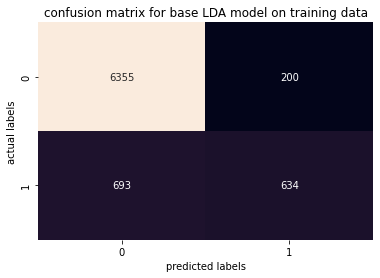

In [ ]:
# training data
sns.heatmap(confusion_matrix(y_train, train_pred_mod1), cbar=False, annot=True, fmt='d')
plt.xlabel('predicted labels')
plt.ylabel('actual labels')
plt.title('confusion matrix for base LDA model on training data')

Text(0.5, 1.0, 'confusion matrix for base LDA model on testing data')

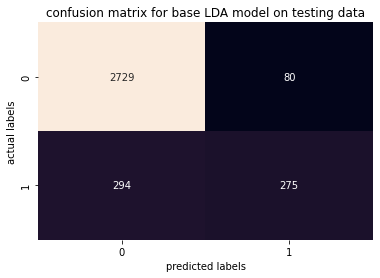

In [ ]:
# testing data
sns.heatmap(confusion_matrix(y_test, test_pred_mod1), cbar=False, annot=True, fmt='d')
plt.xlabel('predicted labels')
plt.ylabel('actual labels')
plt.title('confusion matrix for base LDA model on testing data')

In [ ]:
mod1.score(x_train, y_train)

0.8867038822633849

In [ ]:
mod1.score(x_train, y_train)

0.8867038822633849

the auc score for mod1 on training dataset is: 0.882


Text(0.5, 1.0, 'ROC curve for base LDA model on training data')

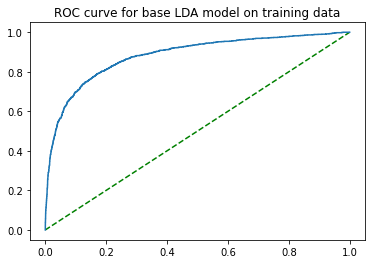

In [ ]:
# training data
probs1 = mod1.predict_proba(x_train)
probs1 = probs1[:,1]

auc_score_mod1_train = roc_auc_score(y_train, probs1)
print('the auc score for mod1 on training dataset is: %.3f' %auc_score_mod1_train)

train_tpr_mod1, train_fpr_mod1, train_thresholds_mod1 = roc_curve(y_train,probs1)
plt.plot([0,1],[0,1], linestyle='--', color='g')
plt.plot(train_tpr_mod1, train_fpr_mod1)
plt.title('ROC curve for base LDA model on training data')

the auc score for mod1 on testing dataset is: 0.864


Text(0.5, 1.0, 'ROC curve for base LDA model on testing data')

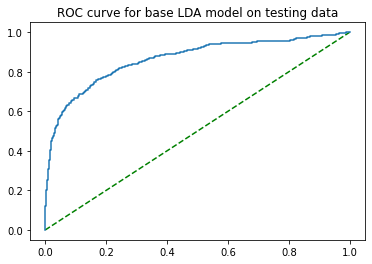

In [ ]:
# testing dataset
probs2 = mod1.predict_proba(x_test)
probs2 = probs2[:,1]

auc_score_mod1_test = roc_auc_score(y_test, probs2)
print('the auc score for mod1 on testing dataset is: %.3f' %auc_score_mod1_test)

test_tpr_mod1, test_fpr_mod1, test_thresholds_mod1 = roc_curve(y_test,probs2)
plt.plot([0,1],[0,1], linestyle='--', color='g')
plt.plot(test_tpr_mod1, test_fpr_mod1)
plt.title('ROC curve for base LDA model on testing data')

In [ ]:
#Tuning
from sklearn.model_selection import GridSearchCV

params = {
    'solver' : ['svd', 'lsqr', 'eigen'],
    'tol' : [0.001,0.0001,0.00001]
}
lda_model =  LinearDiscriminantAnalysis()
grid = GridSearchCV(estimator = lda_model, param_grid=params, cv=5, scoring='recall', verbose=3)

In [ ]:
start = time.time()
grid.fit(x_train, y_train)
end = time.time()

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5] END .............solver=svd, tol=0.001;, score=0.429 total time=   0.0s
[CV 2/5] END .............solver=svd, tol=0.001;, score=0.485 total time=   0.1s
[CV 3/5] END .............solver=svd, tol=0.001;, score=0.506 total time=   0.1s
[CV 4/5] END .............solver=svd, tol=0.001;, score=0.457 total time=   0.1s
[CV 5/5] END .............solver=svd, tol=0.001;, score=0.491 total time=   0.1s
[CV 1/5] END ............solver=svd, tol=0.0001;, score=0.429 total time=   0.1s
[CV 2/5] END ............solver=svd, tol=0.0001;, score=0.485 total time=   0.1s
[CV 3/5] END ............solver=svd, tol=0.0001;, score=0.506 total time=   0.1s
[CV 4/5] END ............solver=svd, tol=0.0001;, score=0.457 total time=   0.1s
[CV 5/5] END ............solver=svd, tol=0.0001;, score=0.491 total time=   0.1s
[CV 1/5] END .............solver=svd, tol=1e-05;, score=0.429 total time=   0.1s
[CV 2/5] END .............solver=svd, tol=1e-05;,

In [ ]:
print('the time for algo execution is: {}'.format(end-start))

the time for algo execution is: 3.2561116218566895


In [ ]:
grid.best_params_

{'solver': 'svd', 'tol': 0.001}

In [ ]:
grid.best_estimator_

LinearDiscriminantAnalysis(tol=0.001)

In [ ]:
mod2 = LinearDiscriminantAnalysis(tol=0.001, solver='svd')
mod2.fit(x_train, y_train)

LinearDiscriminantAnalysis(tol=0.001)

In [ ]:
for idx, col_name in enumerate(x_train.columns):
    print("The coefficient for {} is {}".format(col_name, mod2.coef_[0][idx]))

The coefficient for Tenure is -1.1118530030707399
The coefficient for City_Tier is 0.37854746267947
The coefficient for CC_Contacted_LY is 0.2931463617301073
The coefficient for Service_Score is -0.0894546157187107
The coefficient for Account_user_count is 0.37005926532225114
The coefficient for CC_Agent_Score is 0.387917621225501
The coefficient for rev_per_month is 0.41009775072790844
The coefficient for Complain_ly is 0.8635723238619586
The coefficient for rev_growth_yoy is -0.07112771967221883
The coefficient for coupon_used_for_payment is 0.11177472708034196
The coefficient for Day_Since_CC_connect is -0.2234207654757541
The coefficient for cashback is -0.12847908391942323
The coefficient for Payment_Credit Card is -0.40385389855606335
The coefficient for Payment_Debit Card is -0.350996618133123
The coefficient for Payment_E wallet is -0.07368027187117787
The coefficient for Payment_UPI is -0.20401118745107974
The coefficient for Gender_Male is 0.10338163523809717
The coefficient 

In [ ]:
train_pred_mod2 = mod2.predict(x_train)
test_pred_mod2 = mod2.predict(x_test)

In [ ]:
print(classification_report(y_train, train_pred_mod2))

              precision    recall  f1-score   support

         0.0       0.90      0.97      0.93      6555
         1.0       0.76      0.48      0.59      1327

    accuracy                           0.89      7882
   macro avg       0.83      0.72      0.76      7882
weighted avg       0.88      0.89      0.88      7882



In [ ]:
print(classification_report(y_test, test_pred_mod2))

              precision    recall  f1-score   support

         0.0       0.90      0.97      0.94      2809
         1.0       0.77      0.48      0.60       569

    accuracy                           0.89      3378
   macro avg       0.84      0.73      0.77      3378
weighted avg       0.88      0.89      0.88      3378



In [ ]:
mod2.score(x_train , y_train)

0.8867038822633849

In [ ]:
mod2.score(x_test, y_test)

0.8892835997631735

the auc score for mod2 on training dataset is: 0.882


Text(0.5, 1.0, 'ROC curve for tuned LDA model on training data')

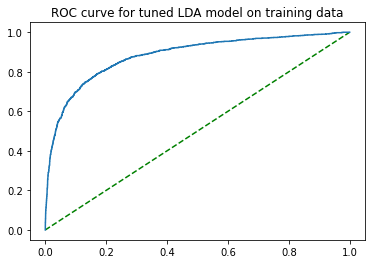

In [ ]:
# training data
probs3 = mod2.predict_proba(x_train)
probs3 = probs3[:,1]

auc_score_mod2_train = roc_auc_score(y_train, probs3)
print('the auc score for mod2 on training dataset is: %.3f' %auc_score_mod2_train)

train_tpr_mod2, train_fpr_mod2, train_thresholds_mod2 = roc_curve(y_train, probs3)
plt.plot([0,1],[0,1], linestyle='--', color='g')
plt.plot(train_tpr_mod2, train_fpr_mod2)
plt.title('ROC curve for tuned LDA model on training data')

the auc score for mod2 on testing dataset is: 0.864


Text(0.5, 1.0, 'ROC curve for base tuned model on testing data')

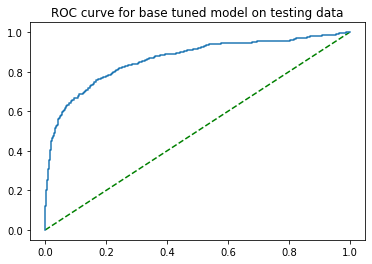

In [ ]:
# testing dataset
probs4 = mod2.predict_proba(x_test)
probs4 = probs4[:,1]

auc_score_mod2_test = roc_auc_score(y_test, probs4)
print('the auc score for mod2 on testing dataset is: %.3f' %auc_score_mod2_test)

test_tpr_mod2, test_fpr_mod2, test_thresholds_mod2 = roc_curve(y_test, probs4)
plt.plot([0,1], [0,1], linestyle='--', color='g')
plt.plot(test_tpr_mod2, test_fpr_mod2)
plt.title('ROC curve for base tuned model on testing data')

In [ ]:
# Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

mod3 = LogisticRegression( max_iter=1000,random_state=1 )
mod3.fit(x_train, y_train)

LogisticRegression(max_iter=1000, random_state=1)

In [ ]:
train_pred_mod3 = mod3.predict(x_train)
test_pred_mod3 = mod3.predict(x_test)

In [ ]:
print(classification_report(y_train, train_pred_mod3))

              precision    recall  f1-score   support

         0.0       0.91      0.97      0.94      6555
         1.0       0.77      0.52      0.62      1327

    accuracy                           0.89      7882
   macro avg       0.84      0.74      0.78      7882
weighted avg       0.88      0.89      0.88      7882



In [ ]:
print(classification_report(y_test, test_pred_mod3))

              precision    recall  f1-score   support

         0.0       0.91      0.97      0.94      2809
         1.0       0.78      0.52      0.62       569

    accuracy                           0.89      3378
   macro avg       0.84      0.75      0.78      3378
weighted avg       0.89      0.89      0.89      3378



Text(0.5, 1.0, 'confusion matrix for base Logistic Regression model on training data')

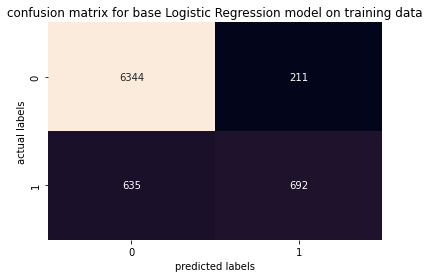

In [ ]:
# training data
sns.heatmap(confusion_matrix(y_train, train_pred_mod3), cbar=False, annot=True, fmt='d')
plt.xlabel('predicted labels')
plt.ylabel('actual labels')
plt.title('confusion matrix for base Logistic Regression model on training data')

Text(0.5, 1.0, 'confusion matrix for base Logistic Regression model on testing data')

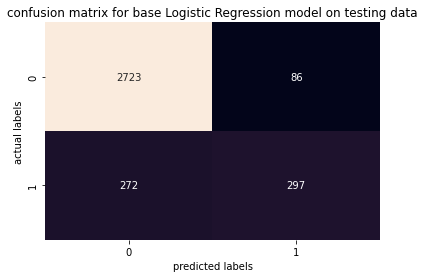

In [ ]:
# testing data
sns.heatmap(confusion_matrix(y_test, test_pred_mod3), cbar=False, annot=True, fmt='d')
plt.xlabel('predicted labels')
plt.ylabel('actual labels')
plt.title('confusion matrix for base Logistic Regression model on testing data')

In [ ]:
mod3.score(x_train, y_train)

0.89266683582847

In [ ]:
mod3.score(x_train, y_train)

0.89266683582847

In [ ]:
#Tuning


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

params = {
    'solver' : ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'tol' : [0.01,0.001,0.0001],
    #'penalty': ['l1', 'l2'],
    'max_iter': [1000, 10000],
    'C' : np.logspace(-4,4,10,20),
}
logit_model =  LogisticRegression(max_iter = 50000,random_state=1, class_weight='balanced')
grid = GridSearchCV(estimator = logit_model, param_grid=params, cv=5, scoring='recall', verbose=3)

In [ ]:
start = time.time()
grid.fit(x_train, y_train)
end = time.time()

Fitting 5 folds for each of 300 candidates, totalling 1500 fits
[CV 1/5] END C=0.0001, max_iter=1000, solver=newton-cg, tol=0.01;, score=0.808 total time=   0.1s
[CV 2/5] END C=0.0001, max_iter=1000, solver=newton-cg, tol=0.01;, score=0.782 total time=   0.1s
[CV 3/5] END C=0.0001, max_iter=1000, solver=newton-cg, tol=0.01;, score=0.800 total time=   0.1s
[CV 4/5] END C=0.0001, max_iter=1000, solver=newton-cg, tol=0.01;, score=0.785 total time=   0.1s
[CV 5/5] END C=0.0001, max_iter=1000, solver=newton-cg, tol=0.01;, score=0.770 total time=   0.1s
[CV 1/5] END C=0.0001, max_iter=1000, solver=newton-cg, tol=0.001;, score=0.808 total time=   0.0s
[CV 2/5] END C=0.0001, max_iter=1000, solver=newton-cg, tol=0.001;, score=0.782 total time=   0.0s
[CV 3/5] END C=0.0001, max_iter=1000, solver=newton-cg, tol=0.001;, score=0.800 total time=   0.1s
[CV 4/5] END C=0.0001, max_iter=1000, solver=newton-cg, tol=0.001;, score=0.785 total time=   0.0s
[CV 5/5] END C=0.0001, max_iter=1000, solver=newto

In [ ]:
print('the time for algo execution is: {}'.format(end-start))

the time for algo execution is: 131.82024574279785


In [ ]:
grid.best_params_

{'C': 0.0001, 'max_iter': 1000, 'solver': 'liblinear', 'tol': 0.01}

In [ ]:
grid.best_estimator_

LogisticRegression(C=0.0001, class_weight='balanced', max_iter=1000,
                   random_state=1, solver='liblinear', tol=0.01)

In [ ]:
mod4 = LogisticRegression(C=0.0001, class_weight='balanced', max_iter=1000,
                   random_state=1, solver='liblinear', tol=0.01)
mod4.fit(x_train, y_train)

LogisticRegression(C=0.0001, class_weight='balanced', max_iter=1000,
                   random_state=1, solver='liblinear', tol=0.01)

In [ ]:
for idx, col_name in enumerate(x_train.columns):
    print("The coefficient for {} is {}".format(col_name, mod4.coef_[0][idx]))

The coefficient for Tenure is -0.1294646004580145
The coefficient for City_Tier is 0.03684324999583566
The coefficient for CC_Contacted_LY is 0.03339604823417727
The coefficient for Service_Score is 0.0014027980149265698
The coefficient for Account_user_count is 0.042728505138889705
The coefficient for CC_Agent_Score is 0.04133354926448947
The coefficient for rev_per_month is 0.02422060315120402
The coefficient for Complain_ly is 0.09385167083553203
The coefficient for rev_growth_yoy is -0.010166929036919785
The coefficient for coupon_used_for_payment is -0.0008420683894734738
The coefficient for Day_Since_CC_connect is -0.05035735118828351
The coefficient for cashback is -0.04455043257114499
The coefficient for Payment_Credit Card is -0.0183964524730544
The coefficient for Payment_Debit Card is -0.017124634118918174
The coefficient for Payment_E wallet is 0.021238037735180845
The coefficient for Payment_UPI is 0.005491512371408253
The coefficient for Gender_Male is 0.00981570028636044

In [ ]:
mod4.intercept_

array([-0.02322509])

In [ ]:
train_pred_mod4 = mod4.predict(x_train)
test_pred_mod4 = mod4.predict(x_test)

In [ ]:
# training data
print(classification_report(y_train, train_pred_mod4))

              precision    recall  f1-score   support

         0.0       0.96      0.60      0.74      6555
         1.0       0.31      0.87      0.45      1327

    accuracy                           0.65      7882
   macro avg       0.63      0.74      0.60      7882
weighted avg       0.85      0.65      0.69      7882



In [ ]:
# testing data
print(classification_report(y_test, test_pred_mod4))

              precision    recall  f1-score   support

         0.0       0.95      0.60      0.74      2809
         1.0       0.30      0.84      0.44       569

    accuracy                           0.64      3378
   macro avg       0.62      0.72      0.59      3378
weighted avg       0.84      0.64      0.69      3378



Text(0.5, 1.0, 'confusion matrix for tuned Logistic Regression model on training data')

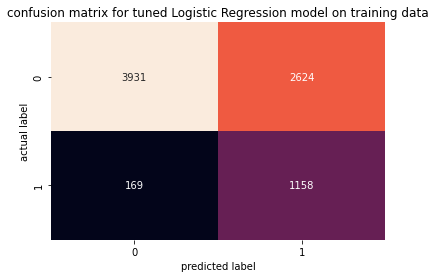

In [ ]:
# training dataset
sns.heatmap(confusion_matrix(y_train, train_pred_mod4), annot=True, cbar=False, fmt='d')
plt.xlabel('predicted label')
plt.ylabel('actual label')
plt.title('confusion matrix for tuned Logistic Regression model on training data')

Text(0.5, 1.0, 'confusion matrix for tuned Logistic Regression model on testing data')

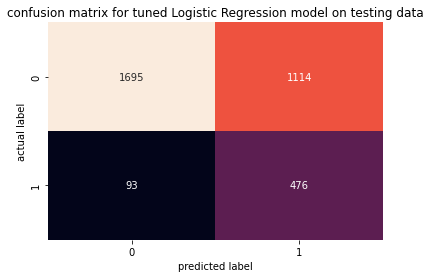

In [ ]:
# testing dataset
sns.heatmap(confusion_matrix(y_test, test_pred_mod4), annot=True, cbar=False, fmt='d')
plt.xlabel('predicted label')
plt.ylabel('actual label')
plt.title('confusion matrix for tuned Logistic Regression model on testing data')

In [ ]:
mod4.score(x_train , y_train)

0.6456483126110124

In [ ]:
mod4.score(x_test, y_test)

0.642687981053878

the auc score for mod4 on training dataset is: 0.851


Text(0.5, 1.0, 'ROC curve for tuned Logistic Regression model on training data')

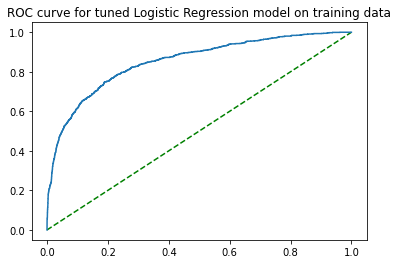

In [ ]:
# training dataset
probs7 = mod4.predict_proba(x_train)
probs7 = probs7[:,1]

auc_score_mod4_train = roc_auc_score(y_train, probs7)
print('the auc score for mod4 on training dataset is: %.3f' %auc_score_mod4_train)

train_tpr_mod4, train_fpr_mod4, train_thresholds_mod4 = roc_curve(y_train, probs7)
plt.plot([0,1],[0,1], linestyle='--', color='g')
plt.plot(train_tpr_mod4, train_fpr_mod4)
plt.title('ROC curve for tuned Logistic Regression model on training data')

the auc score for mod4 on testing dataset is: 0.829


Text(0.5, 1.0, 'ROC curve for tuned Logistic Regression model on testing data')

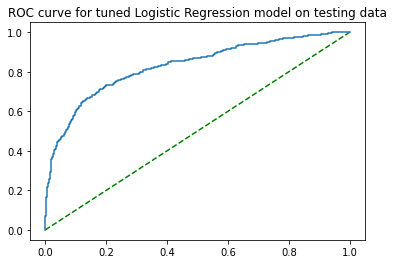

In [ ]:
# testing dataset
probs8 = mod4.predict_proba(x_test)
probs8 = probs8[:,1]

auc_score_mod4_test = roc_auc_score(y_test, probs8)
print('the auc score for mod4 on testing dataset is: %.3f' %auc_score_mod4_test)

test_tpr_mod4, test_fpr_mod4, test_thresholds_mod4 = roc_curve(y_test, probs8)
plt.plot([0,1], [0,1], linestyle='--', color='g')
plt.plot(test_tpr_mod4, test_fpr_mod4)
plt.title('ROC curve for tuned Logistic Regression model on testing data')

In [ ]:
# ANN Model
from sklearn.neural_network import MLPClassifier

mod19 = MLPClassifier(random_state=1, max_iter=1000)
mod19.fit(x_train, y_train)

MLPClassifier(max_iter=1000, random_state=1)

In [ ]:
train_pred_mod19 = mod19.predict(x_train)
test_pred_mod19 = mod19.predict(x_test)

In [ ]:
# training dataset
print(classification_report(y_train, train_pred_mod19))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      6555
         1.0       1.00      1.00      1.00      1327

    accuracy                           1.00      7882
   macro avg       1.00      1.00      1.00      7882
weighted avg       1.00      1.00      1.00      7882



In [ ]:
# testing dataset
print(classification_report(y_test, test_pred_mod19))

              precision    recall  f1-score   support

         0.0       0.98      0.99      0.99      2809
         1.0       0.94      0.92      0.93       569

    accuracy                           0.98      3378
   macro avg       0.96      0.95      0.96      3378
weighted avg       0.98      0.98      0.98      3378



Text(0.5, 1.0, 'confusion matrix for base ANN model on training data')

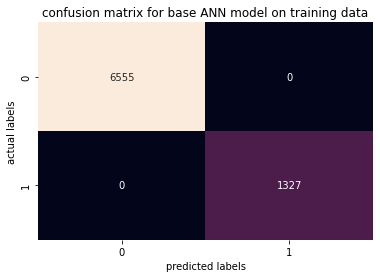

In [ ]:
# Confusion Matrix
# training dataset
sns.heatmap(confusion_matrix(y_train, train_pred_mod19), annot=True, fmt='d', cbar=False)
plt.xlabel('predicted labels')
plt.ylabel('actual labels')
plt.title('confusion matrix for base ANN model on training data')

Text(0.5, 1.0, 'confusion matrix for base ANN model on testing data')

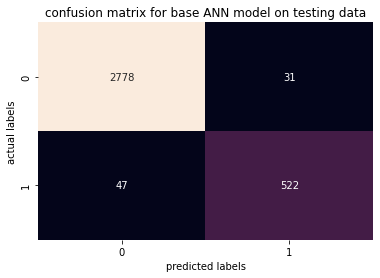

In [ ]:
# testing dataset
sns.heatmap(confusion_matrix(y_test, test_pred_mod19), annot=True, fmt='d', cbar=False)
plt.xlabel('predicted labels')
plt.ylabel('actual labels')
plt.title('confusion matrix for base ANN model on testing data')

In [ ]:
# Score
# training dataset
mod19.score(x_train, y_train)

1.0

In [ ]:
# testing dataset
mod19.score(x_test, y_test)

0.9769094138543517

the auc score for mod19 on training dataset is: 1.000


Text(0.5, 1.0, 'ROC curve for base ANN model on training data')

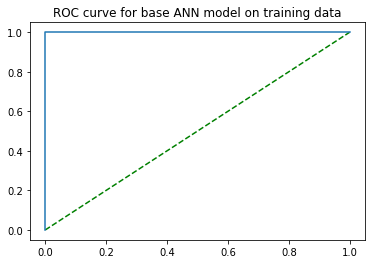

In [ ]:
# ROC
# training dataset
probs37 = mod19.predict_proba(x_train)
probs37 = probs37[:,1]

auc_score_mod19_train = roc_auc_score(y_train, probs37)
print('the auc score for mod19 on training dataset is: %.3f' %auc_score_mod19_train)

train_tpr_mod19, train_fpr_mod19, train_thresholds_mod19 = roc_curve(y_train, probs37)
plt.plot([0,1], [0,1], linestyle='--', color='g')
plt.plot(train_tpr_mod19, train_fpr_mod19)
plt.title('ROC curve for base ANN model on training data')

the auc score for mod19 on testing dataset is: 0.983


Text(0.5, 1.0, 'ROC curve for base ANN model on testing data')

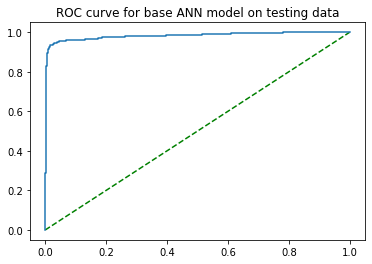

In [ ]:
# testing dataset
probs38 = mod19.predict_proba(x_test)
probs38 = probs38[:,1]

auc_score_mod19_test = roc_auc_score(y_test, probs38)
print('the auc score for mod19 on testing dataset is: %.3f' %auc_score_mod19_test)

test_tpr_mod19, test_fpr_mod19, test_thresholds_mod19 = roc_curve(y_test, probs38)
plt.plot([0,1], [0,1], linestyle='--', color='g')
plt.plot(test_tpr_mod19, test_fpr_mod19)
plt.title('ROC curve for base ANN model on testing data')

In [ ]:
# Tuned ANN Model
from sklearn.model_selection import GridSearchCV

params = {
    'activation': ['logistic', 'relu', 'tanh', 'identity' ],
    'hidden_layer_sizes': [100, 200, 300, (100,100), (200,200), (300,300), (100, 100, 100)],
    'max_iter' : [10000],
    'solver': ['sgd', 'adam', 'lbfgs'],
    #'tol': [0.1,0.5,0.01],
    
}

ann = MLPClassifier(random_state=1)
grid = GridSearchCV(estimator=ann, param_grid=params,scoring='recall', cv=5, verbose=3)

In [ ]:
start = time.time()
grid.fit(x_train, y_train)
end = time.time()

Fitting 5 folds for each of 84 candidates, totalling 420 fits
[CV 1/5] END activation=logistic, hidden_layer_sizes=100, max_iter=10000, solver=sgd;, score=0.410 total time=  13.8s
[CV 2/5] END activation=logistic, hidden_layer_sizes=100, max_iter=10000, solver=sgd;, score=0.466 total time=  17.1s
[CV 3/5] END activation=logistic, hidden_layer_sizes=100, max_iter=10000, solver=sgd;, score=0.479 total time=  15.2s
[CV 4/5] END activation=logistic, hidden_layer_sizes=100, max_iter=10000, solver=sgd;, score=0.445 total time=  14.8s
[CV 5/5] END activation=logistic, hidden_layer_sizes=100, max_iter=10000, solver=sgd;, score=0.460 total time=  15.1s
[CV 1/5] END activation=logistic, hidden_layer_sizes=100, max_iter=10000, solver=adam;, score=0.925 total time=  38.9s
[CV 2/5] END activation=logistic, hidden_layer_sizes=100, max_iter=10000, solver=adam;, score=0.876 total time=  38.7s
[CV 3/5] END activation=logistic, hidden_layer_sizes=100, max_iter=10000, solver=adam;, score=0.909 total time

In [ ]:
print('the time for algo execution is: {}'.format(end-start))


In [ ]:
grid.best_params_

In [ ]:
grid.best_estimator_

In [ ]:
mod20 = MLPClassifier(activation='tanh', hidden_layer_sizes=(300, 300), max_iter=10000,
              random_state=1)
mod20.fit(x_train,y_train)

In [ ]:
train_pred_mod20 = mod20.predict(x_train)
test_pred_mod20 = mod20.predict(x_test)

In [ ]:
# Report
# training data
print('Classification Report For Training Data')
print(classification_report(y_train, train_pred_mod20))

In [ ]:
# testing data
print('Classification Report For Testing Data')
print(classification_report(y_test, test_pred_mod20))

In [ ]:
# Confusion Matrix for Tuned ANN Model
# training dataset
sns.heatmap(confusion_matrix(y_train, train_pred_mod20), annot=True, cbar=False, fmt='d')
plt.xlabel('predicted label')
plt.ylabel('actual label')
plt.title('confusion matrix for tuned ANN model on training data')

In [ ]:
# testing dataset
sns.heatmap(confusion_matrix(y_test, test_pred_mod20), annot=True, cbar=False, fmt='d')
plt.xlabel('predicted label')
plt.ylabel('actual label')
plt.title('confusion matrix for tuned ANN model on testing data')

In [ ]:
# Model Score
# trianing dataset
mod20.score(x_train , y_train)

In [ ]:
# testing dataset
mod20.score(x_test, y_test)

In [ ]:
# ROC-AUC Score for Tuned ANN Model
# training dataset
probs39 = mod20.predict_proba(x_train)
probs39 = probs39[:,1]

auc_score_mod20_train = roc_auc_score(y_train, probs39)
print('the auc score for mod20 on training dataset is: %.3f' %auc_score_mod20_train)

train_tpr_mod20, train_fpr_mod20, train_thresholds_mod20 = roc_curve(y_train, probs39)
plt.plot([0,1],[0,1], linestyle='--', color='g')
plt.plot(train_tpr_mod20, train_fpr_mod20)
plt.title('ROC curve for tuned ANN model on training data')

In [ ]:
# testing dataset
probs40 = mod20.predict_proba(x_test)
probs40 = probs40[:,1]

auc_score_mod20_test = roc_auc_score(y_test, probs40)
print('the auc score for mod20 on testing dataset is: %.3f' %auc_score_mod20_test)

test_tpr_mod20, test_fpr_mod20, test_thresholds_mod20 = roc_curve(y_test, probs40)
plt.plot([0,1], [0,1], linestyle='--', color='g')
plt.plot(test_tpr_mod20, test_fpr_mod20)
plt.title('ROC curve for tuned ANN model on testing data')

In [ ]:
# Recall
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score 

ANN_model = MLPClassifier(activation='tanh', hidden_layer_sizes=(300, 300), max_iter=10000,
              random_state=1)

ANN_kfold_Recall = cross_val_score(ANN_model, x_train, y_train, cv=10, scoring='recall', verbose=3)
ANN_kfold_Recall

In [ ]:
np.mean(ANN_kfold_Recall)

In [ ]:
ANN_kfold_accuracy = cross_val_score(ANN_model, x_train, y_train, cv=10, scoring='accuracy', verbose=3)
ANN_kfold_accuracy

In [ ]:
np.mean(ANN_kfold_accuracy)

In [ ]:
ANN_kfold_precision = cross_val_score(ANN_model, x_train, y_train, cv=10, scoring='precision', verbose=3)
ANN_kfold_precision

In [ ]:
np.mean(ANN_kfold_precision)

F1 score cross validation

In [ ]:
ANN_kfold_f1 = cross_val_score(ANN_model, x_train, y_train, cv=10, scoring='f1', verbose=3)
ANN_kfold_f1

In [ ]:
np.mean(ANN_kfold_f1)